In [1]:
# Import libraries necessary for this project
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
import numpy as np

from sklearn.model_selection import train_test_split as tts

%matplotlib inline

In [2]:
data = pd.read_csv('usa_housing_data.csv')
data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
data.tail(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [4]:
data.shape

(4600, 18)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
date             4600 non-null object
price            4600 non-null float64
bedrooms         4600 non-null float64
bathrooms        4600 non-null float64
sqft_living      4600 non-null int64
sqft_lot         4600 non-null int64
floors           4600 non-null float64
waterfront       4600 non-null int64
view             4600 non-null int64
condition        4600 non-null int64
sqft_above       4600 non-null int64
sqft_basement    4600 non-null int64
yr_built         4600 non-null int64
yr_renovated     4600 non-null int64
street           4600 non-null object
city             4600 non-null object
statezip         4600 non-null object
country          4600 non-null object
dtypes: float64(4), int64(9), object(5)
memory usage: 647.0+ KB


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
date             4600 non-null object
price            4600 non-null float64
bedrooms         4600 non-null float64
bathrooms        4600 non-null float64
sqft_living      4600 non-null int64
sqft_lot         4600 non-null int64
floors           4600 non-null float64
waterfront       4600 non-null int64
view             4600 non-null int64
condition        4600 non-null int64
sqft_above       4600 non-null int64
sqft_basement    4600 non-null int64
yr_built         4600 non-null int64
yr_renovated     4600 non-null int64
street           4600 non-null object
city             4600 non-null object
statezip         4600 non-null object
country          4600 non-null object
dtypes: float64(4), int64(9), object(5)
memory usage: 647.0+ KB


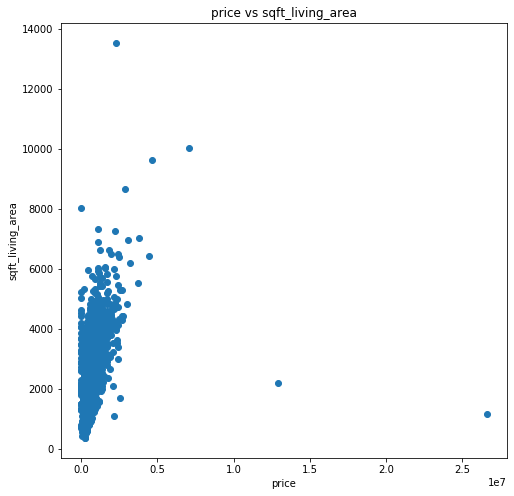

In [7]:
plt.figure(figsize=(8,8 ))
plt.scatter(x=data['price'],y=data['sqft_living'])
plt.title('price vs sqft_living_area')
plt.xlabel('price')
plt.ylabel('sqft_living_area')
plt.show()

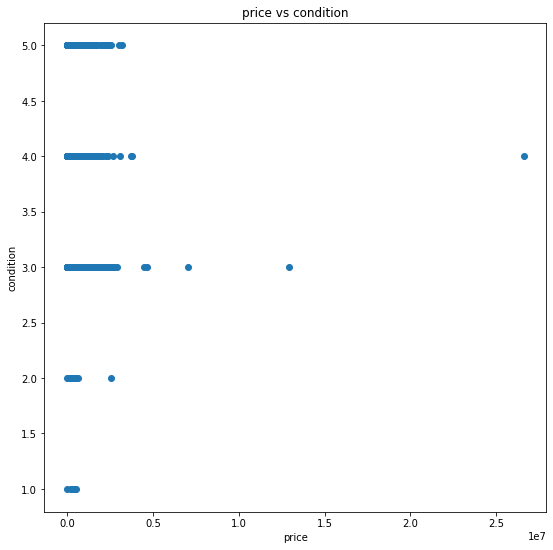

In [8]:
plt.figure(figsize=(9, 9))
plt.scatter(x=data['price'],y=data['condition'])
plt.title('price vs condition')
plt.xlabel('price')
plt.ylabel('condition')
plt.show()

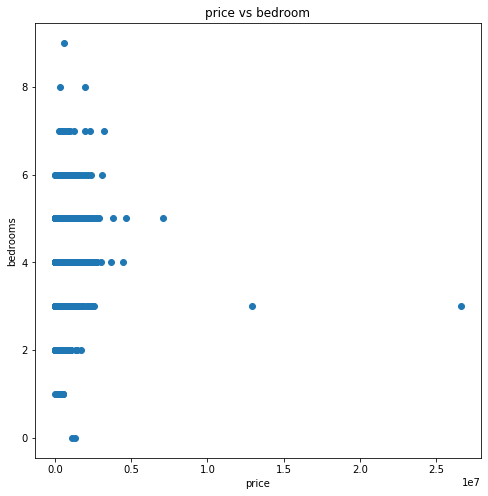

In [9]:
plt.figure(figsize=(8,8 ))
plt.scatter(x=data['price'],y=data['bedrooms'])
plt.title('price vs bedroom')
plt.xlabel('price')
plt.ylabel('bedrooms')
plt.show()

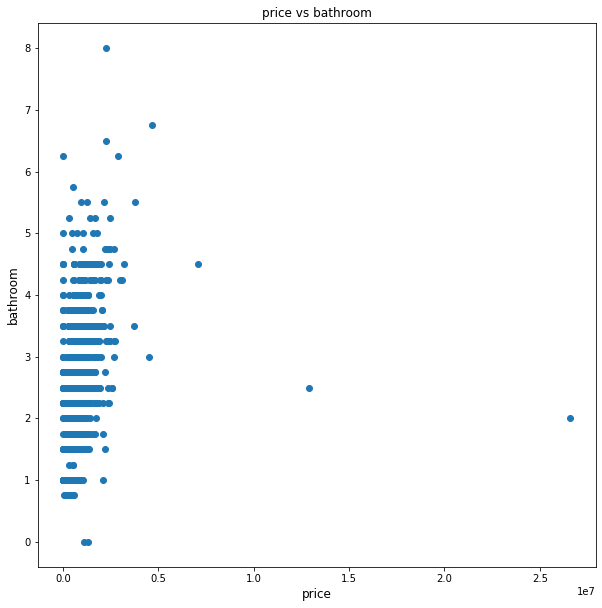

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(x=data['price'],y=data['bathrooms'])
plt.title('price vs bathroom')
plt.ylabel('bathroom',fontsize=12)
plt.xlabel('price',fontsize=12)
plt.show()

In [11]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [12]:
#features are
fet=[ 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']

x_fet=data[fet]
y_tar=data['price']

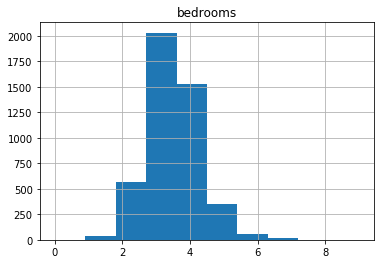

In [13]:
plt.title("bedrooms")
data['bedrooms'].hist()


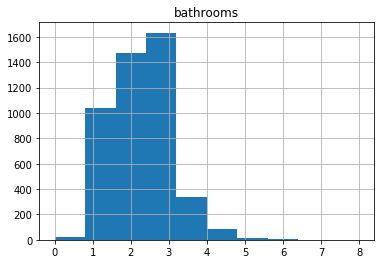

In [14]:
plt.title("bathrooms")
data['bathrooms'].hist()


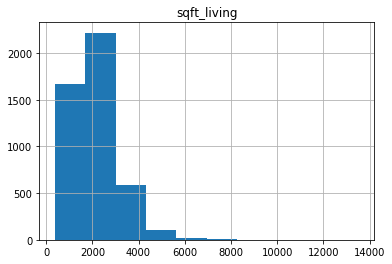

In [15]:
plt.title("sqft_living")
data['sqft_living'].hist()


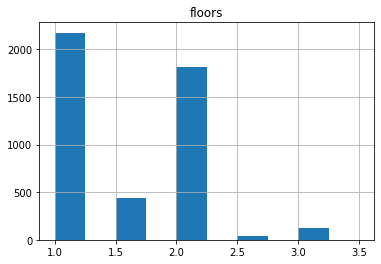

In [16]:
plt.title("floors")
data['floors'].hist()


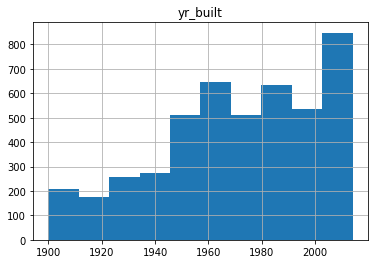

In [17]:
plt.title("yr_built")
data['yr_built'].hist()

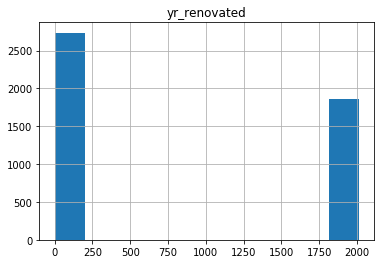

In [18]:
plt.title("yr_renovated")
data['yr_renovated'].hist()


In [19]:
X_train, X_test, Y_train, Y_test = tts(x_fet, y_tar, test_size = 0.1, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4140, 12)
(460, 12)
(4140,)
(460,)


In [20]:
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 

poly = PolynomialFeatures(degree = 2) 
X_train_poly = poly.fit_transform(X_train) 

poly.fit(X_train_poly,Y_train) 
 

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [21]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)
  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
 # predicting on test data-set
y_test_predict = poly_model.predict(poly.fit_transform(X_test))

In [23]:
r2_test = r2_score(Y_test, y_test_predict)
print("Accuracy is {} %".format(int(r2_test*100)))

Accuracy is 56 %
